##### Copyright 2018 The TensorFlow Authors.

**Finding K Optimal Value**


Dataset link: https://raw.githubusercontent.com/VijayShanmugan/Datasets/main/Classified%20Data.csv


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/VijayShanmugan/Datasets/main/Classified%20Data.csv')
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [3]:
df.columns, df.shape

(Index(['Unnamed: 0', 'WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF',
        'HQE', 'NXJ', 'TARGET CLASS'],
       dtype='object'), (1000, 12))

In [4]:
df['TARGET CLASS'].value_counts()

1    500
0    500
Name: TARGET CLASS, dtype: int64

In [5]:
X = df.drop(['TARGET CLASS'], axis = 1)
X.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167


In [6]:
y = df['TARGET CLASS']
y.head()

0    1
1    0
2    0
3    1
4    1
Name: TARGET CLASS, dtype: int64

In [7]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
Pred_y = neigh.predict(X_test)

In [10]:
print("Accuracy of model at K=4 is",metrics.accuracy_score(y_test, Pred_y))

Accuracy of model at K=4 is 0.94


In [11]:
Pred_y

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0])

Minimum error:- 0.045 at K = 12


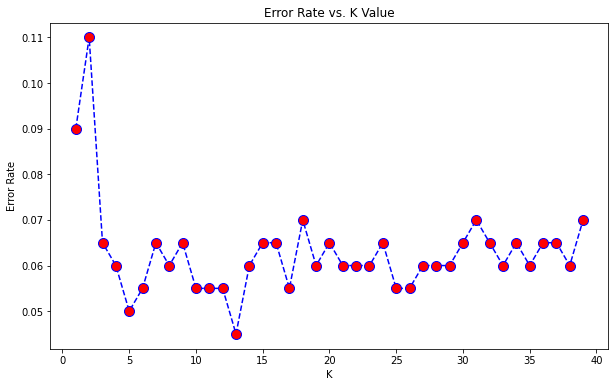

In [12]:
Ks = 40
error_rate = []
# Will take some time
for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [13]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

Maximum accuracy:- 0.955 at K = 12


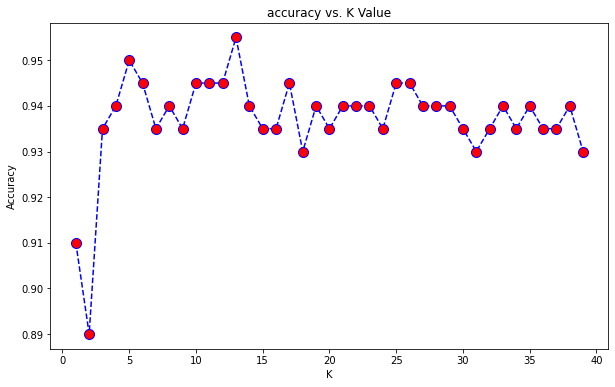

In [14]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

**CONCLUSION: OPTIMAL K VALUE FOR THE GIVEN DATASET - 12**

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## **Introduction to Colab and Python**

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l01c01_introduction_to_colab_and_python.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l01c01_introduction_to_colab_and_python.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

Welcome to this Colab where you will get a quick introduction to the Python programming language and the environment used for the course's exercises: Colab.

Colab is a Python development environment that runs in the browser using Google Cloud.

For example, to print "Hello World", just hover the mouse over [ ] and press the play button to the upper left. Or press shift-enter to execute.

In [ ]:
print("Hello World")

## Functions, Conditionals, and Iteration
Let's create a Python function, and call it from a loop.

In [ ]:
def HelloWorldXY(x, y):
  if (x < 10):
    print("Hello World, x was < 10")
  elif (x < 20):
    print("Hello World, x was >= 10 but < 20")
  else:
    print("Hello World, x was >= 20")
  return x + y

for i in range(8, 25, 5):  # i=8, 13, 18, 23 (start, stop, step)
  print("--- Now running with i: {}".format(i))
  r = HelloWorldXY(i,i)
  print("Result from HelloWorld: {}".format(r))

In [ ]:
print(HelloWorldXY(1,2))

Easy, right?

If you want a loop starting at 0 to 2 (exclusive) you could do any of the following

In [ ]:
print("Iterate over the items. `range(2)` is like a list [0,1].")
for i in range(2):
  print(i)

print("Iterate over an actual list.")
for i in [0,1]:
  print(i)

print("While works")
i = 0
while i < 2:
  print(i)
  i += 1

In [ ]:
print("Python supports standard key words like continue and break")
while True:
  print("Entered while")
  break

## Numpy and lists
Python has lists built into the language.
However, we will use a library called numpy for this.
Numpy gives you lots of support functions that are useful when doing Machine Learning.

Here, you will also see an import statement. This statement makes the entire numpy package available and we can access those symbols using the abbreviated 'np' syntax.

In [ ]:
import numpy as np  # Make numpy available using np.

# Create a numpy array, and append an element
a = np.array(["Hello", "World"])
a = np.append(a, "!")
print("Current array: {}".format(a))
print("Printing each element")
for i in a:
  print(i)

print("\nPrinting each element and their index")
for i,e in enumerate(a):
  print("Index: {}, was: {}".format(i, e))

In [ ]:
print("\nShowing some basic math on arrays")
b = np.array([0,1,4,3,2])
print("Max: {}".format(np.max(b)))
print("Average: {}".format(np.average(b)))
print("Max index: {}".format(np.argmax(b)))

In [ ]:
print("\nYou can print the type of anything")
print("Type of b: {}, type of b[0]: {}".format(type(b), type(b[0])))

In [ ]:
print("\nUse numpy to create a [3,3] dimension array with random number")
c = np.random.rand(3, 3)
print(c)

In [ ]:
print("\nYou can print the dimensions of arrays")
print("Shape of a: {}".format(a.shape))
print("Shape of b: {}".format(b.shape))
print("Shape of c: {}".format(c.shape))
print("...Observe, Python uses both [0,1,2] and (0,1,2) to specify lists")

## Colab Specifics

Colab is a virtual machine you can access directly. To run commands at the VM's terminal, prefix the line with an exclamation point (!).


In [ ]:
print("\nDoing $ls on filesystem")
!ls -l
!pwd

In [ ]:
print("Install numpy")  # Just for test, numpy is actually preinstalled in all Colab instances
!pip install numpy

**Exercise**

Create a code cell underneath this text cell and add code to:


*   List the path of the current directory (pwd)
* Go to / (cd) and list the content (ls -l)

In [ ]:
!pwd
!cd /
!ls -l
print("Hello")

All usage of Colab in this course is completely free or charge. Even GPU usage is provided free of charge for some hours of usage every day.

**Using GPUs**
* Many of the exercises in the course executes more quickly by using GPU runtime: Runtime | Change runtime type | Hardware accelerator | GPU

**Some final words on Colab**
*   You execute each cell in order, you can edit & re-execute cells if you want
*   Sometimes, this could have unintended consequences. For example, if you add a dimension to an array and execute the cell multiple times, then the cells after may not work. If you encounter problem reset your environment:
  *   Runtime -> Restart runtime... Resets your Python shell
  *   Runtime -> Restart all runtimes... Will reset the Colab image, and get you back to a 100% clean environment
* You can also clear the output in the Colab by doing: Edit -> Clear all outputs
* Colabs in this course are loaded from GitHub. Save to your Google Drive if you want a copy with your code/output: File -> Save a copy in Drive...

**Learn More**
*   Check out [this](https://www.youtube.com/watch?v=inN8seMm7UI&list=PLQY2H8rRoyvwLbzbnKJ59NkZvQAW9wLbx&index=3) episode of #CodingTensorFlow, and don't forget to subscribe to the YouTube channel ;)
